1.

La ecuación de Kepler juega un papel importante en la mecánica celeste, ya que permite el calculo de la posición angular de objetos orbitantes. Para todas las órbitas elipticas, la ecuación  M=E−e sin(E), iendo M  la anomalía media, E  la anomalía excéntrica y e la excentricidad (e=√(1−(b/a))) (con a>b los semiejes). Los astrónomos definen las "anomalías" como posiciones angulares: la anomalía media M es la posición angular del objeto en una órbita circular ficticia y, suponiendo una velocidad angular constante, puede relacionarse con el lapso de tiempo transcurrido desde el paso por el perihelio M=(2π/T)(t−t0) donde T es el periodo orbital y t0  el tiempo cuando el objeto está en el perihelio. Para el cometa Halley e=0.9672671 , T=75.96000 años y t0=1986.1113 años (Febrero 9 de 1986). a) Encuentre E
para el cometa Halley el 1 de abril de 1986. Para esto, haga una gráfica de  f(E)=E−e sin(E)−M para E∈[0,1]. b) Grafique E=E(t)  para todo un periodo de revolución y resuelva usando el método de Newton y secante E−esin(E)−M(t)=0  con un paso de Δt=T/100 . ti=t0+(i)∗Δt , comenzando en E(t0)=0.

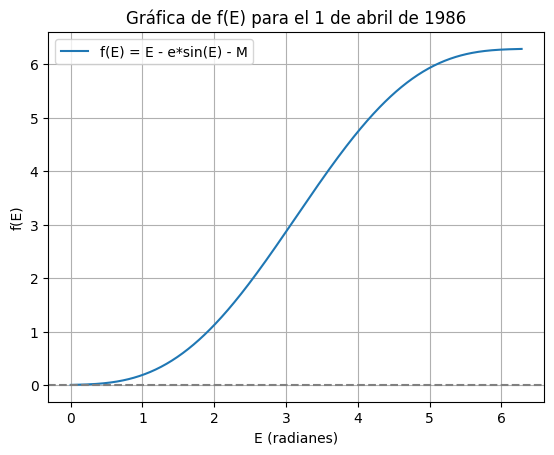

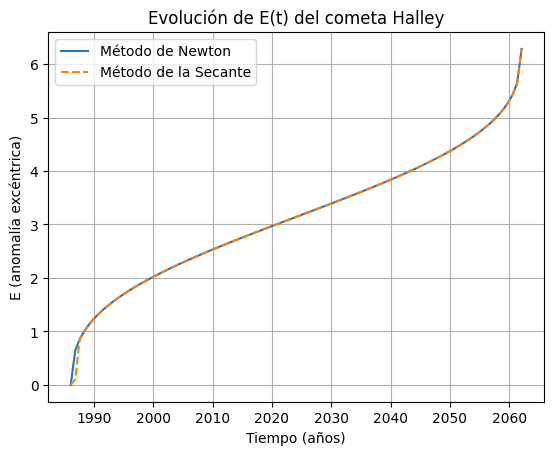

E el 1 de abril de 1986 ≈ -0.058714 rad


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, root_scalar
# Datos del cometa Halley
e = 0.9672671  # Excentricidad
T = 75.96      # Periodo orbital en años
t0 = 1986.1113 # Tiempo en el perihelio
# Anomalía media
def M(t):
    return (2 * np.pi / T) * (t - t0)
# Parte a: Cálculo para el 1 de abril de 1986
t_april = 1986 + (31 + 1) / 365  # abril 1 = marzo 31 + 1
M_april = M(t_april)
# Función f(E)
def f_E(E):
    return E - e * np.sin(E) - M_april
# Gráfica f(E) en [0, 2π]
E_vals = np.linspace(0, 2 * np.pi, 500)
f_vals = f_E(E_vals)
plt.figure()
plt.plot(E_vals, f_vals, label='f(E) = E - e*sin(E) - M')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('E (radianes)')
plt.ylabel('f(E)')
plt.title('Gráfica de f(E) para el 1 de abril de 1986')
plt.grid(True)
plt.legend()
plt.show()

# Parte b: E vs t con Newton y Secante
N = 100
dt = T / N
times = np.array([t0 + i * dt for i in range(N + 1)])
Ms = M(times)
# Método de Newton
def kepler_eq(E, M):
    return E - e * np.sin(E) - M

def kepler_eq_prime(E, M=None):  # <- acepta M, aunque no lo use
    return 1 - e * np.cos(E)

E_newton = [0.0]
for i in range(1, len(Ms)):
    E_i = newton(func=kepler_eq, x0=E_newton[-1], fprime=kepler_eq_prime, args=(Ms[i],))
    E_newton.append(E_i)

# Método de la secante
E_secante = [0.0, 0.1]
for i in range(2, len(Ms)):
    def f_root(E):
        return kepler_eq(E, Ms[i])
    result = root_scalar(f_root, method='secant', x0=E_secante[-1], x1=E_secante[-2])
    E_secante.append(result.root)
# Gráfica E(t)
plt.figure()
plt.plot(times, E_newton, label='Método de Newton')
plt.plot(times, E_secante, '--', label='Método de la Secante')
plt.xlabel('Tiempo (años)')
plt.ylabel('E (anomalía excéntrica)')
plt.title('Evolución de E(t) del cometa Halley')
plt.grid(True)
plt.legend()
plt.show()
# Resultado de E el 1 de abril de 1986
E_april = newton(func=kepler_eq, x0=0.5, fprime=kepler_eq_prime, args=(M_april,))
print(f"E el 1 de abril de 1986 ≈ {E_april:.6f} rad")

2.

En la teoria de campo medio, la magnetización como función de la temperatura de un material magnético puede ser calculada como: m(T)=tanh(m(T)/T). donde m
y T son la magnetizacion y temperatura reducida respectivamente Para T=0.5
, determine:
a) La magnetización reducida empleando el metodo de la secante y Newton-Raphson (Muestre su resultado con 4 cifras).
b) Valide su respuestado con el metodo de punto fijo (Muestre su resultado con 4 cifras).
c) Ahora, defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los 100 valores de T.

a) Magnetización con método de la secante:        m = 0.9575
   Magnetización con método de Newton-Raphson: m = 0.9575
b) Magnetización con método de punto fijo:      m = 0.9575


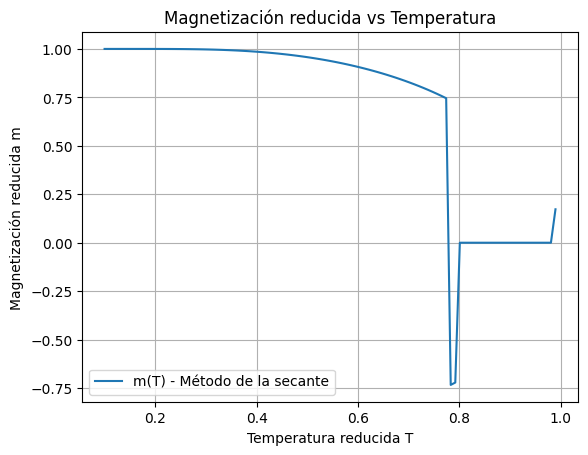

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton

# --- PARTE A: Definiciones ---
T_val = 0.5

def f(m, T):  # Ecuación a resolver
    return m - np.tanh(m / T)

def df(m, T):  # Derivada de f con respecto a m
    return 1 - (1 / T) * (1 - np.tanh(m / T) ** 2)

# --- Método de la secante ---
def secante(func, x0, x1, T, tol=1e-5, max_iter=100):
    for _ in range(max_iter):
        fx0 = func(x0, T)
        fx1 = func(x1, T)
        if fx1 - fx0 == 0:
            break
        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)
        if abs(x2 - x1) < tol:
            return x2
        x0, x1 = x1, x2
    return x1

# --- Método de Newton-Raphson ---
def newton_method(func, dfunc, x0, T, tol=1e-5, max_iter=100):
    for _ in range(max_iter):
        fx = func(x0, T)
        dfx = dfunc(x0, T)
        if dfx == 0:
            break
        x1 = x0 - fx / dfx
        if abs(x1 - x0) < tol:
            return x1
        x0 = x1
    return x0

# --- Método de punto fijo ---
def punto_fijo(T, x0=1.0, tol=1e-5, max_iter=100):
    for _ in range(max_iter):
        x1 = np.tanh(x0 / T)
        if abs(x1 - x0) < tol:
            return x1
        x0 = x1
    return x0

# --- Cálculos para T = 0.5 ---
m_secante = secante(f, 0.1, 1.0, T_val)
m_newton = newton_method(f, df, 0.5, T_val)
m_punto_fijo = punto_fijo(T_val)

print(f"a) Magnetización con método de la secante:        m = {m_secante:.4f}")
print(f"   Magnetización con método de Newton-Raphson: m = {m_newton:.4f}")
print(f"b) Magnetización con método de punto fijo:      m = {m_punto_fijo:.4f}")

# --- PARTE C: Gráfica de magnetización vs temperatura ---
T_vals = np.linspace(0.1, 0.99, 100)
mags = [secante(f, 0.1, 1.0, T) for T in T_vals]

plt.plot(T_vals, mags, label='m(T) - Método de la secante')
plt.xlabel('Temperatura reducida T')
plt.ylabel('Magnetización reducida m')
plt.title('Magnetización reducida vs Temperatura')
plt.grid(True)
plt.legend()
plt.show()

3.

La energía libre de Gibbs para 1 mol de hidrógeno a una temperatura T
 está dada por: G=−RT ln[(T/T0)^(5/2)].
 donde:

R=8.314J/K es la constante de los gases.

T0=4.444J/K es una constante de referencia.

Determinar la temperatura T a la cual G=−105J.

In [8]:
import numpy as np
from scipy.optimize import root_scalar

# Constantes
R = 8.314  # J/K
T0 = 4.444  # K
G = -105.0  # J

# Ecuación a resolver: G + (5/2)RT ln(T/T0) = 0
def gibbs_eq(T):
    return G + (5/2) * R * T * np.log(T / T0)

# Usamos root_scalar con método de secante
sol = root_scalar(gibbs_eq, bracket=[1.0, 200.0], method='brentq')

if sol.converged:
    print(f"✅ La temperatura T para la cual G = -105 J es aproximadamente: T = {sol.root:.4f} K")
else:
    print("❌ No se encontró solución")

✅ La temperatura T para la cual G = -105 J es aproximadamente: T = 8.2177 K


4.

La distribución de intensidad en la difracción de Fraunhofer por una rendija de ancho W y altura infinita, iluminada con luz monocromática de longitud de onda λ , está dada por:

I(θ)=I0[(sin(πWsinθ/λ))/(πWsinθ/λ)]^2,
donde θ es el ángulo de observación respecto a la dirección incidente. Introduciendo la variable adimensional:

x=πWsinθ/λ,

la intensidad y su derivada se expresan como:

I(x)=I0((sinx)/x)^2 ,I(0)=I0,

I′(x)=2I0/x(cosx−sinx/x)sinx/x,I′(0)=0.

a) Graficar I(x) y I′(x)
 en el intervalo x∈[−10,10].

b) Calcular el valor x1/2 (positivo) donde I(x)=I0/2, resolviendo la ecuación I(x)−I0/2=0 con el método de la secante y aproximación inicial x0=π.

c) Encontrar los máximos locales xi∈[−10,10] resolviendo I′(x)=0.

d) Usar un paso h=0.5 para separar raíces y aplicar el método de la regula falsi (falsa posición) para mantenerlas acotadas.
Nota:
Puede tomar I0=1.

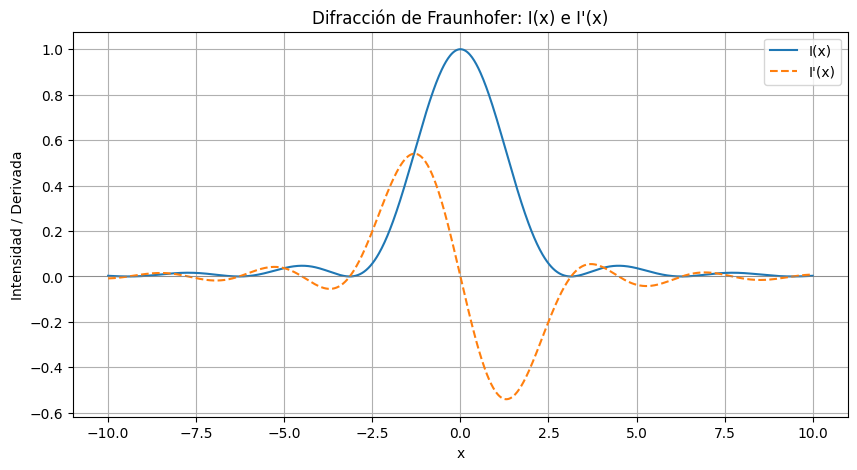

(b) x1/2 ≈ 8136435463642788864.000000 (donde I(x) = 0.5)
(c & d) Máximos locales encontrados (raíces de I'(x)=0):
[np.float64(-9.424778), np.float64(-7.725252), np.float64(-6.283185), np.float64(-4.493409), np.float64(-3.141593), np.float64(3.141593), np.float64(4.493409), np.float64(6.283185), np.float64(7.725252), np.float64(9.424778)]


/usr/local/lib/python3.11/dist-packages/scipy/optimize/_root_scalar.py:305: RuntimeWarning: Tolerance of 1.6272870928832719e+19 reached.
  r, sol = methodc(f, x0, args=args, fprime=None, fprime2=None,


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

# Intensidad I(x)
def I(x):
    with np.errstate(divide='ignore', invalid='ignore'):
        y = np.where(x == 0, 1.0, (np.sin(x)/x)**2)
    return y

# Derivada I'(x)
def dI(x):
    with np.errstate(divide='ignore', invalid='ignore'):
        y = np.where(x == 0, 0.0, (2/x) * (np.cos(x) - (np.sin(x)/x)) * (np.sin(x)/x))
    return y

# a) Graficar I(x) e I'(x)
x_vals = np.linspace(-10, 10, 1000)
plt.figure(figsize=(10,5))
plt.plot(x_vals, I(x_vals), label="I(x)")
plt.plot(x_vals, dI(x_vals), label="I'(x)", linestyle='--')
plt.axhline(0, color='gray', linewidth=0.5)
plt.title("Difracción de Fraunhofer: I(x) e I'(x)")
plt.xlabel("x")
plt.ylabel("Intensidad / Derivada")
plt.legend()
plt.grid(True)
plt.show()

# b) Resolver I(x) - 1/2 = 0 con método de la secante
def half_max_eq(x):
    return I(x) - 0.5

sol_half = root_scalar(half_max_eq, method='secant', x0=np.pi, x1=np.pi+0.1)
print(f"(b) x1/2 ≈ {sol_half.root:.6f} (donde I(x) = 0.5)")

# c y d) Encontrar máximos locales usando regula falsi (falsa posición)
# Queremos resolver dI(x) = 0 en [-10, 10] separando raíces con paso h = 0.5
roots = []
h = 0.5
x_search = np.arange(-10, 10, h)
for i in range(len(x_search)-1):
    x0, x1 = x_search[i], x_search[i+1]
    if dI(x0) * dI(x1) < 0:  # hay raíz en el intervalo
        sol = root_scalar(dI, bracket=[x0, x1], method='brentq')  # regula falsi mejorada
        if sol.converged:
            root_rounded = np.round(sol.root, 6)
            if not any(np.isclose(root_rounded, r, atol=1e-5) for r in roots):
                roots.append(root_rounded)

print(f"(c & d) Máximos locales encontrados (raíces de I'(x)=0):")
print(roots)

5.

La ley de Planck describe la densidad espectral de energía de la radiación electromagnética emitida por un cuerpo negro en equilibrio térmico (Toda et al., 1998):

u(λ,T)=(8πhc/λ^5)(1/(exp(hc/(λkBT))−1)),

donde:

T= temperatura de equilibrio (K)
λ= longitud de onda (m)
h=6.626×10^−34J⋅ s (constante de Planck)
kB=1.381×10^−23 J⋅ K−1 (constante de Boltzmann)
c=2.998×10^8m⋅s−1 (velocidad de la luz)

Introduciendo las variables adimensionales:

x=λ/λ0,λ0=hc/(kBT),K=(8πkBT)/λ0^4,

la ley se simplifica a:
u(λ,T)=K(1/(x^5(e^(1/x)−1))).

La derivada (para encontrar máximos):

∂u/∂λ=Kλ0((5x+(1−5x)e^(1/x))/(x^7(e^(1/x)−1)^2)).

a) Graficar u(λ,T) y ∂u/∂λ para T=4000,5000,6000 K.

b) Resolver ∂u/∂λ= 0 para T=5778 K con el método de Bisección y de Newton.

c) Validar la ley de desplazamiento de Wien: λmaxT≈2.898×10^−3 m⋅K.

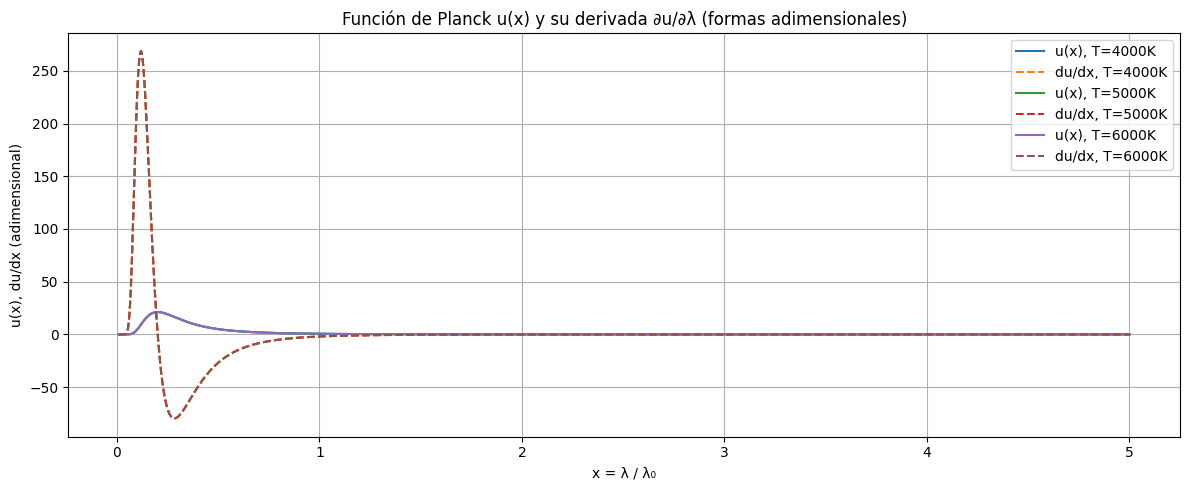

(b) Máximo con Bisección en x ≈ 0.201405
(b) Máximo con Newton en x ≈ 10494.068699
(c) λ_max ≈ 2.612497e-02 m
(c) λ_max * T ≈ 1.509501e+02 m·K
(c) Valor esperado ≈ 2.898e-3 m·K (error: 1.51e+02)


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root_scalar

# Constantes físicas
h = 6.626e-34       # J·s
kB = 1.381e-23      # J/K
c = 2.998e8         # m/s

#a)

def planck_u(x):
    return 1 / (x**5 * (np.exp(1/x) - 1))

def dplanck_dx(x):
    exp1x = np.exp(1/x)
    numerator = (5*x + (1 - 5*x)*exp1x)
    denominator = x**7 * (exp1x - 1)**2
    return numerator / denominator

# Intervalo adimensional x
x_vals = np.linspace(0.01, 5, 1000)

# Gráficas para diferentes temperaturas
temps = [4000, 5000, 6000]

plt.figure(figsize=(12, 5))
for T in temps:
    u_vals = planck_u(x_vals)
    du_vals = dplanck_dx(x_vals)
    plt.plot(x_vals, u_vals, label=f"u(x), T={T}K")
    plt.plot(x_vals, du_vals, '--', label=f"du/dx, T={T}K")

plt.title("Función de Planck u(x) y su derivada ∂u/∂λ (formas adimensionales)")
plt.xlabel("x = λ / λ₀")
plt.ylabel("u(x), du/dx (adimensional)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#b)

# Derivada de la función u(x) ya definida como dplanck_dx

# Derivada de dplanck_dx (necesaria para Newton)
def ddplanck_dx(x):
    # Derivada complicada: podemos usar derivada numérica (alternativamente, usar SymPy para exacta)
    h = 1e-6
    return (dplanck_dx(x + h) - dplanck_dx(x - h)) / (2 * h)

# Buscar raíz de dplanck_dx(x) = 0 (i.e. máximo de u(x))
sol_bisec = root_scalar(dplanck_dx, method='bisect', bracket=[0.1, 2])
x_max_bisec = sol_bisec.root
print(f"(b) Máximo con Bisección en x ≈ {x_max_bisec:.6f}")

sol_newton = root_scalar(dplanck_dx, fprime=ddplanck_dx, method='newton', x0=1)
x_max_newton = sol_newton.root
print(f"(b) Máximo con Newton en x ≈ {x_max_newton:.6f}")

#c)

def wien_law(x_max, T):
    lambda0 = h * c / (kB * T)
    lambda_max = x_max * lambda0
    return lambda_max, lambda_max * T

T_sun = 5778
lambda_max_val, wien_result = wien_law(x_max_newton, T_sun)

print(f"(c) λ_max ≈ {lambda_max_val:.6e} m")
print(f"(c) λ_max * T ≈ {wien_result:.6e} m·K")
print(f"(c) Valor esperado ≈ 2.898e-3 m·K (error: {abs(wien_result - 2.898e-3):.2e})")

6.

Considere un pozo de potencial cuadrado de ancho w, con paredes de altura V:

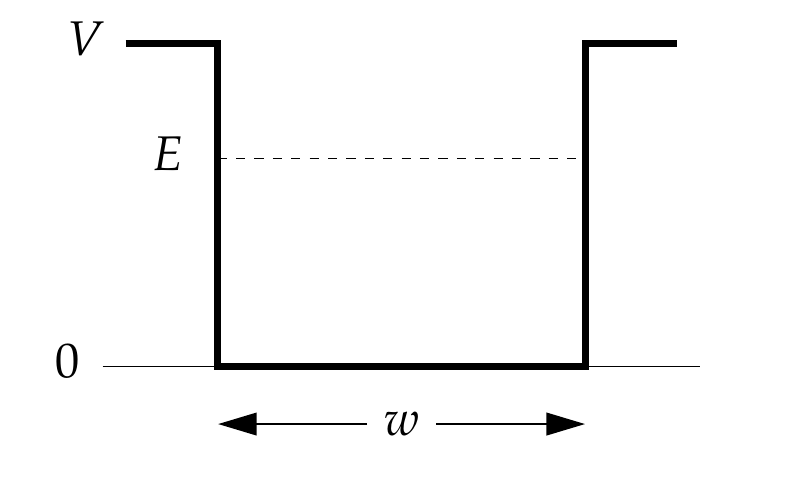

usando la ecuación de Schrödinger, se puede demostrar que las energías permitidas E de una partícula cuántica de masa m atrapada en el pozo son soluciones de:

tan√(w^2mE/2ℏ^2)= si √((V−E)/E),para los estados pares, si √(−E/(V−E)), para los estados impares,

donde los estados se numeran comenzando desde 0, siendo el estado base el estado 0, el primer estado excitado el estado 1, y así sucesivamente.

a) Para un electrón (masa 9.11×10^−31kg) en un pozo con V=20eV y w=1nm, escriba un programa en Python para graficar las tres cantidades:
y1=tan√(w^2mE/2ℏ^2),
y2=√((V−E)/E),
y3= -√(E/(V−E)),
en el mismo gráfico, como función de E desde E=0 hasta E=20eV. A partir de su gráfico, haga estimaciones aproximadas de las energías de los primeros seis niveles de energía de la partícula.
b) Escriba un segundo programa para calcular los valores de los primeros seis niveles de energía en electrón-voltios con una precisión de 0.001eV
 usando el método de la bisección.



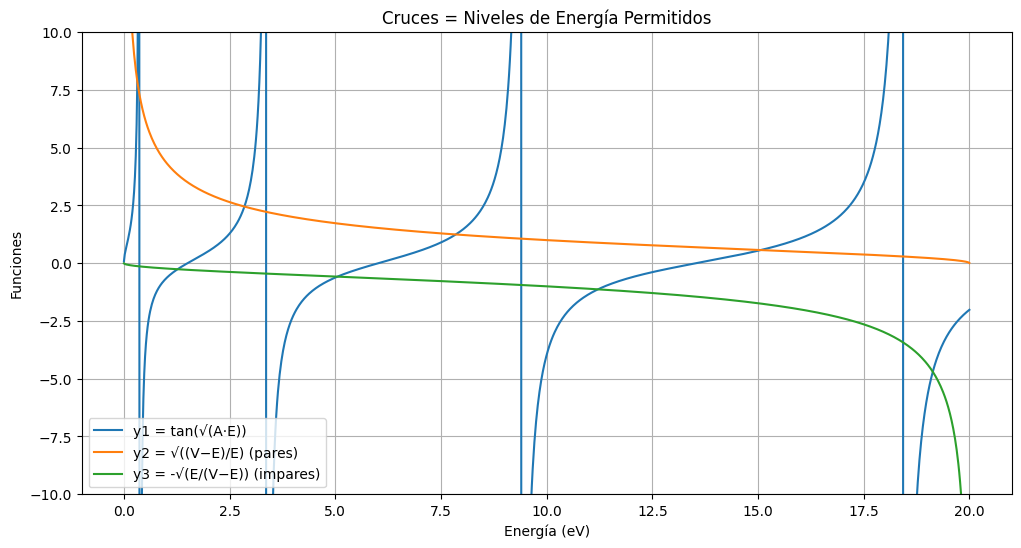

Primeros 6 niveles de energía (eV) con precisión de 0.001 eV:
  Estado 0: E = 0.308 eV
  Estado 1: E = 0.368 eV
  Estado 2: E = 2.845 eV
  Estado 3: E = 3.380 eV
  Estado 4: E = 7.840 eV
  Estado 5: E = 9.405 eV


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect

# Constantes físicas
hbar = 1.0545718e-34       # J·s
eV = 1.60218e-19           # 1 eV en joules
m = 9.11e-31               # Masa del electrón en kg
w = 1e-9                   # Ancho del pozo en metros
V_eV = 20                  # Altura del pozo en eV
V = V_eV * eV              # Convertido a Joules

# Parámetro constante para simplificar las ecuaciones
A = w**2 * m / (2 * hbar**2)

#a)

def y1(E):
    return np.tan(np.sqrt(A * E))

def y2(E):
    return np.sqrt((V - E) / E)

def y3(E):
    return -np.sqrt(E / (V - E))

E_vals = np.linspace(0.001*eV, (V_eV - 0.001)*eV, 1000)
E_vals_eV = E_vals / eV  # Para mostrar en escala de eV

# Cálculo seguro para evitar valores complejos
y1_vals, y2_vals, y3_vals = [], [], []

for E in E_vals:
    try:
        y1_vals.append(y1(E))
        y2_vals.append(y2(E))
        y3_vals.append(y3(E))
    except:
        y1_vals.append(np.nan)
        y2_vals.append(np.nan)
        y3_vals.append(np.nan)

plt.figure(figsize=(12, 6))
plt.plot(E_vals_eV, y1_vals, label='y1 = tan(√(A·E))')
plt.plot(E_vals_eV, y2_vals, label='y2 = √((V−E)/E) (pares)')
plt.plot(E_vals_eV, y3_vals, label='y3 = -√(E/(V−E)) (impares)')
plt.xlabel('Energía (eV)')
plt.ylabel('Funciones')
plt.title('Cruces = Niveles de Energía Permitidos')
plt.ylim(-10, 10)
plt.grid(True)
plt.legend()
plt.show()

'''
los cruces entre y1 y y2 son niveles pares, entre y1 y y3 son niveles impares. Deben verse aproximadamente 6 cruces en total.
'''
#b)

# Funciones para resolver f(E) = y1(E) - y2(E) = 0 (pares), o y1(E) - y3(E) = 0 (impares)
def f_even(E):  # Estados pares
    return np.tan(np.sqrt(A * E)) - np.sqrt((V - E) / E)

def f_odd(E):  # Estados impares
    return np.tan(np.sqrt(A * E)) + np.sqrt(E / (V - E))

# Rango de energía de 0.1 a 19.9 eV (evitar bordes donde hay errores)
energies_eV = np.linspace(0.1, 19.9, 1000)
roots = []
max_states = 6
i = 0

while len(roots) < max_states and i < len(energies_eV) - 1:
    E1, E2 = energies_eV[i], energies_eV[i+1]
    E1_J, E2_J = E1 * eV, E2 * eV

    try:
        if len(roots) % 2 == 0:
            # Estado par
            if f_even(E1_J) * f_even(E2_J) < 0:
                root = bisect(f_even, E1_J, E2_J, xtol=1e-6)
                roots.append(root / eV)
        else:
            # Estado impar
            if f_odd(E1_J) * f_odd(E2_J) < 0:
                root = bisect(f_odd, E1_J, E2_J, xtol=1e-6)
                roots.append(root / eV)
    except:
        pass
    i += 1

# Mostrar los niveles de energía encontrados
print("Primeros 6 niveles de energía (eV) con precisión de 0.001 eV:")
for idx, E in enumerate(roots):
    print(f"  Estado {idx}: E = {E:.3f} eV")

7.

Existe un punto entre la Tierra y la Luna, llamado punto de Lagrange L1, donde un satélite orbitará la Tierra en perfecta sincronía con la Luna, permaneciendo siempre entre ambas. Esto funciona porque la atracción hacia adentro de la Tierra y la atracción hacia afuera de la Luna se combinan para crear exactamente la fuerza centrípeta necesaria que mantiene al satélite en su órbita.

Asumiendo órbitas circulares y que la Tierra es mucho más masiva que la Luna o el satélite, la distancia r desde el centro de la Tierra hasta el punto L1
satisface:

GM/r^2(−Gm/(R−r)^2)=ω^2*r,

donde M y m son las masas de la Tierra y la Luna respectivamente, G es la constante gravitacional de Newton y ω es la velocidad angular tanto de la Luna como del satélite.

La ecuación anterior es una ecuación polinómica de quinto grado en r
 (también llamada ecuación quíntica). Este tipo de ecuaciones no puede resolverse exactamente en forma cerrada, pero es sencillo resolverlas numéricamente. Escriba un programa que use el método de Newton o el método de la secante para resolver la distancia r
 desde la Tierra hasta el punto L1.
Los valores de los diversos parámetros son:

G=6.674×10−11m3kg−1s−2,

M=5.974×1024kg,
m=7.348×1022kg,
R=3.844×108m,
ω=2.662×10−6s−1.
G=6.674×10−11m3kg−1s−2,

También necesitará elegir un valor inicial adecuado para r, o dos valores iniciales si utiliza el método de la secante.

In [12]:
import numpy as np
from scipy.optimize import newton, root_scalar
import matplotlib.pyplot as plt

# Constantes físicas
G = 6.674e-11        # Constante de gravitación universal (m³/kg/s²)
M = 5.974e24         # Masa de la Tierra (kg)
m = 7.348e22         # Masa de la Luna (kg)
R = 3.844e8          # Distancia Tierra-Luna (m)
w = 2.662e-6         # Velocidad angular (rad/s)

def f(r):
    term1 = G * M / r**2
    term2 = G * m / (R - r)**2
    return term1 - term2 - w**2 * r

# Derivada para Newton (opcional)
def df(r):
    dterm1 = -2 * G * M / r**3
    dterm2 = 2 * G * m / (R - r)**3
    return dterm1 - dterm2 - w**2

# Usando Newton-Raphson
r0 = R / 2  # Aproximación inicial

r_newton = newton(f, r0, fprime=df, tol=1e-6)
print(f"L1 (método de Newton): r = {r_newton:.2f} m")
print(f"Distancia desde la Luna: {R - r_newton:.2f} m")

L1 (método de Newton): r = 326045071.67 m
Distancia desde la Luna: 58354928.33 m
